In [101]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [102]:
img = cv2.imread('./test_images/virat-kohli.webp')
img.shape

(192, 192, 3)

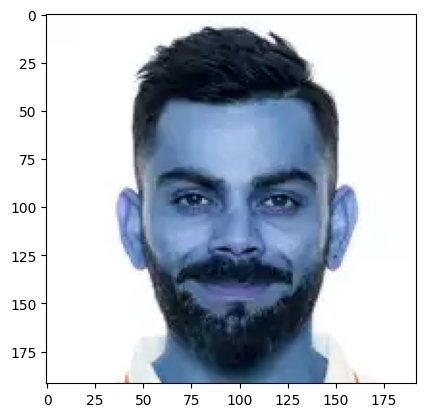

In [103]:
plt.imshow(img)

In [104]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(192, 192)

In [105]:
gray

array([[254, 254, 254, ..., 255, 255, 255],
       [254, 254, 254, ..., 255, 255, 255],
       [254, 254, 254, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

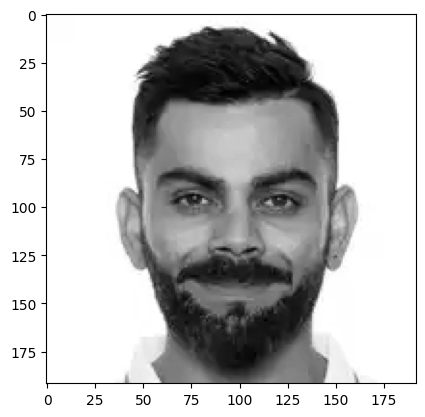

In [106]:
plt.imshow(gray, cmap='gray')

In [107]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 33,  44, 132, 132]])

In [108]:
(x,y,w,h) = faces[0]
x,y,w,h

(33, 44, 132, 132)

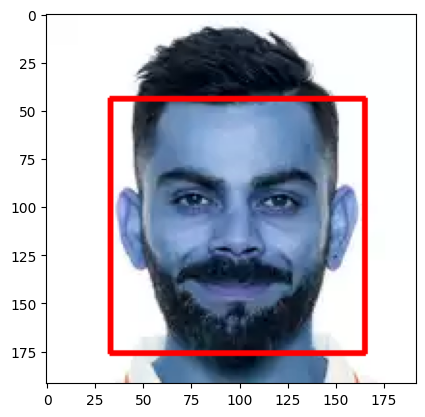

In [109]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

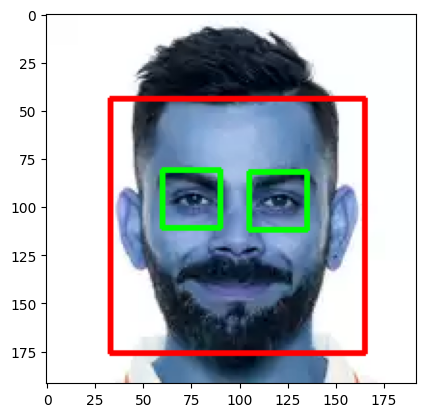

In [110]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


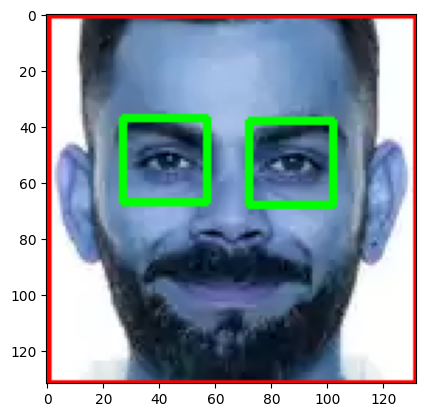

In [111]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [112]:
cropped_img = np.array(roi_color)
cropped_img.shape

(132, 132, 3)

In [113]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

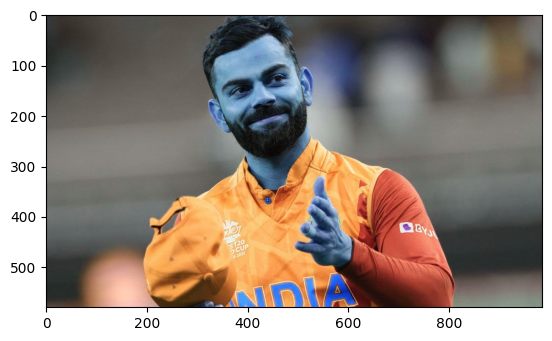

In [114]:
original_image = cv2.imread('./test_images/kohli.jpg')
plt.imshow(original_image)

In [115]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/specs.jpg')
cropped_image

array([[[249, 232, 223],
        [248, 233, 224],
        [246, 234, 224],
        ...,
        [ 59,  61, 126],
        [ 64,  66, 144],
        [ 67,  68, 156]],

       [[250, 232, 225],
        [246, 233, 225],
        [244, 233, 225],
        ...,
        [ 50,  52, 110],
        [ 58,  60, 131],
        [ 65,  62, 147]],

       [[250, 234, 227],
        [247, 234, 226],
        [245, 234, 226],
        ...,
        [ 38,  40,  98],
        [ 49,  51, 122],
        [ 60,  58, 140]],

       ...,

       [[245, 240, 239],
        [244, 237, 234],
        [246, 237, 234],
        ...,
        [199, 217, 186],
        [200, 218, 187],
        [201, 219, 188]],

       [[246, 241, 240],
        [245, 238, 235],
        [247, 238, 235],
        ...,
        [194, 215, 182],
        [196, 217, 184],
        [197, 218, 186]],

       [[247, 242, 241],
        [246, 239, 236],
        [245, 238, 235],
        ...,
        [191, 215, 180],
        [193, 217, 183],
        [194, 218, 184]]

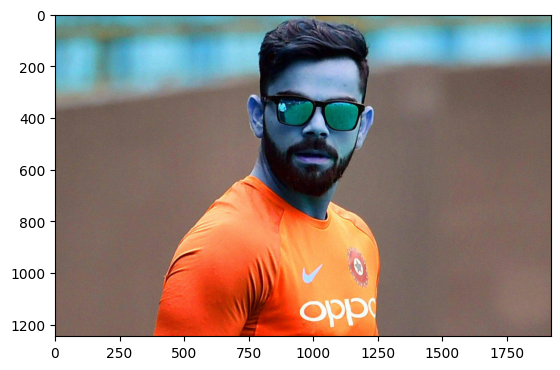

In [116]:
org_image_obstructed = cv2.imread('./test_images/sun.jpg')
plt.imshow(org_image_obstructed)

In [117]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/specs.jpg')
cropped_image_no_2_eyes

array([[[249, 232, 223],
        [248, 233, 224],
        [246, 234, 224],
        ...,
        [ 59,  61, 126],
        [ 64,  66, 144],
        [ 67,  68, 156]],

       [[250, 232, 225],
        [246, 233, 225],
        [244, 233, 225],
        ...,
        [ 50,  52, 110],
        [ 58,  60, 131],
        [ 65,  62, 147]],

       [[250, 234, 227],
        [247, 234, 226],
        [245, 234, 226],
        ...,
        [ 38,  40,  98],
        [ 49,  51, 122],
        [ 60,  58, 140]],

       ...,

       [[245, 240, 239],
        [244, 237, 234],
        [246, 237, 234],
        ...,
        [199, 217, 186],
        [200, 218, 187],
        [201, 219, 188]],

       [[246, 241, 240],
        [245, 238, 235],
        [247, 238, 235],
        ...,
        [194, 215, 182],
        [196, 217, 184],
        [197, 218, 186]],

       [[247, 242, 241],
        [246, 239, 236],
        [245, 238, 235],
        ...,
        [191, 215, 180],
        [193, 217, 183],
        [194, 218, 184]]

In [118]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [119]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [120]:
img_dirs

['./dataset/Amir Khan',
 './dataset/Cristiano Ronaldo',
 './dataset/Kiara Advani',
 './dataset/Lionel Messi',
 './dataset/Virat Kohli']

In [121]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [122]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/Amir Khan
Generating cropped images in folder:  ./dataset/cropped/Cristiano Ronaldo
Generating cropped images in folder:  ./dataset/cropped/Kiara Advani
Generating cropped images in folder:  ./dataset/cropped/Lionel Messi
Generating cropped images in folder:  ./dataset/cropped/Virat Kohli


In [123]:
celebrity_file_names_dict

{'Amir Khan': ['./dataset/cropped/Amir Khan/Amir Khan1.png',
  './dataset/cropped/Amir Khan/Amir Khan2.png',
  './dataset/cropped/Amir Khan/Amir Khan3.png',
  './dataset/cropped/Amir Khan/Amir Khan4.png',
  './dataset/cropped/Amir Khan/Amir Khan5.png',
  './dataset/cropped/Amir Khan/Amir Khan6.png',
  './dataset/cropped/Amir Khan/Amir Khan7.png',
  './dataset/cropped/Amir Khan/Amir Khan8.png',
  './dataset/cropped/Amir Khan/Amir Khan9.png',
  './dataset/cropped/Amir Khan/Amir Khan10.png',
  './dataset/cropped/Amir Khan/Amir Khan11.png',
  './dataset/cropped/Amir Khan/Amir Khan12.png',
  './dataset/cropped/Amir Khan/Amir Khan13.png',
  './dataset/cropped/Amir Khan/Amir Khan14.png',
  './dataset/cropped/Amir Khan/Amir Khan15.png',
  './dataset/cropped/Amir Khan/Amir Khan16.png',
  './dataset/cropped/Amir Khan/Amir Khan17.png',
  './dataset/cropped/Amir Khan/Amir Khan18.png',
  './dataset/cropped/Amir Khan/Amir Khan19.png',
  './dataset/cropped/Amir Khan/Amir Khan20.png',
  './dataset/cro

In [124]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Amir Khan': 0,
 'Cristiano Ronaldo': 1,
 'Kiara Advani': 2,
 'Lionel Messi': 3,
 'Virat Kohli': 4}

In [125]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [126]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [127]:
len(X)

263

In [128]:
len(X[0])

4096

In [129]:
X[0]

array([[100],
       [ 95],
       [ 97],
       ...,
       [198],
       [228],
       [211]], dtype=uint8)

In [130]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(263, 4096)

In [131]:
X[0]

array([100.,  95.,  97., ..., 198., 228., 211.])

In [132]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.803030303030303

In [134]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.80      0.62      0.70        13
           2       0.90      0.95      0.93        20
           3       1.00      0.67      0.80        15
           4       0.55      1.00      0.71         6

    accuracy                           0.80        66
   macro avg       0.79      0.81      0.78        66
weighted avg       0.84      0.80      0.80        66



In [135]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [136]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [137]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.771282,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.593333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.786667,{'logisticregression__C': 5}


In [138]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [139]:
best_estimators['svm'].score(X_test,y_test)

0.9242424242424242

In [140]:
best_estimators['random_forest'].score(X_test,y_test)

0.5757575757575758

In [141]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8787878787878788

In [142]:
best_clf = best_estimators['svm']

In [144]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[12,  0,  0,  0,  0],
       [ 1, 12,  0,  0,  0],
       [ 2,  0, 18,  0,  0],
       [ 1,  1,  0, 13,  0],
       [ 0,  0,  0,  0,  6]], dtype=int64)

In [146]:
class_dict

{'Amir Khan': 0,
 'Cristiano Ronaldo': 1,
 'Kiara Advani': 2,
 'Lionel Messi': 3,
 'Virat Kohli': 4}

In [147]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'Saved_Model.pkl')

['Saved_Model.pkl']

In [148]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))